## 🔹 Étape 1 : Chargement des données

In [1]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Chargement des features et cibles
X_train = joblib.load("train_test/X_train.pkl")
X_test = joblib.load("train_test/X_test.pkl")
y_train = joblib.load("train_test/y_train.pkl")
y_test = joblib.load("train_test/y_test.pkl")

print("✅ Données chargées :", X_train.shape, y_train.shape)


✅ Données chargées : (1007, 1327) (1007,)


## 🌲 Étape 2 : Random Forest

In [2]:
# Entraînement
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction
rf_pred = rf_model.predict(X_test)

# Évaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print(f"MAE (RF) : {rf_mae:.2f}")
print(f"RMSE (RF): {rf_rmse:.2f}")
print(f"R² (RF)   : {rf_r2:.2f}")

# Sauvegarde
joblib.dump(rf_model, "models/random_forest_model.pkl")


MAE (RF) : 14.51
RMSE (RF): 60.58
R² (RF)   : -0.55


['models/random_forest_model.pkl']

## 🧮 Étape 3 : Ridge (régression linéaire régularisée)

In [4]:
#ridge_model = Ridge(alpha=1.0)
ridge_model = Ridge(alpha=1.0, solver="lsqr")
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred) ** 0.5
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"MAE (Ridge) : {ridge_mae:.2f}")
print(f"RMSE (Ridge): {ridge_rmse:.2f}")
print(f"R² (Ridge)  : {ridge_r2:.2f}")

joblib.dump(ridge_model, "models/ridge_model.pkl")


MAE (Ridge) : 25.24
RMSE (Ridge): 56.46
R² (Ridge)  : -0.35


['models/ridge_model.pkl']

## 📊 Étape 4 : Comparaison des modèles

In [5]:
# Affichage comparatif
print("🔸 Random Forest :")
print(f"   MAE  = {rf_mae:.2f}")
print(f"   RMSE = {rf_rmse:.2f}")
print(f"   R²   = {rf_r2:.2f}")
print("\n🔸 Ridge :")
print(f"   MAE  = {ridge_mae:.2f}")
print(f"   RMSE = {ridge_rmse:.2f}")
print(f"   R²   = {ridge_r2:.2f}")


🔸 Random Forest :
   MAE  = 14.51
   RMSE = 60.58
   R²   = -0.55

🔸 Ridge :
   MAE  = 25.24
   RMSE = 56.46
   R²   = -0.35


## 📈 Étape 5 : Visualisation des prédictions

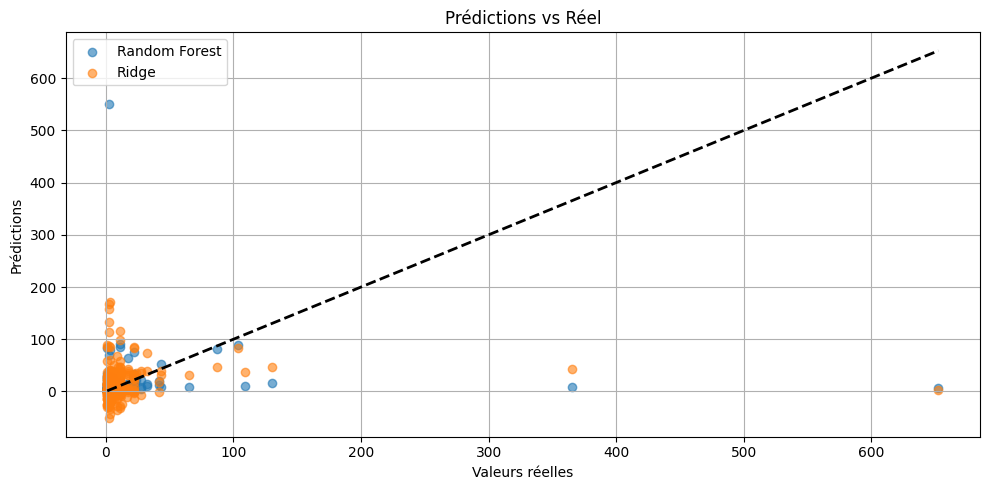

In [6]:
# Comparaison visuelle des prédictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, label='Random Forest', alpha=0.6)
plt.scatter(y_test, ridge_pred, label='Ridge', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Réel")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
